# Redfining features' data-types.  
  
After some exploration on the dataset I noticed the following :  
- All values are set to float even the categorical and boolean.
- Some of the categorical features are boolean features ( two categories 0 and 1).
- Some of the continues features could be categorized as they have a few number of distinct values.

----

So what I'm going to do is to define a new data-set with some changes :  
- analyse each feature and categorize it either [ continues, boolean or categorical ].
- change features names to the format ps_(_cat, bin or cont)_...the rest of the old name ..., the reason for that is to make it easier to find the feature's category using the numpy.str.startwith().
- I'll consider any feature with less than 30  distinct value to be categorical otherwise it's continues.
- Also I'll change the data-type of them to be [ float for continues, bool for boolean and integer for categorical]
- change the values of categorical items to be in range [ 0, number_of_distinct_values_for_this_feature ].


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/data')
print('Data:\t', data.shape)

Data:	 (1488028, 57)


In [3]:
# get lists of features names by their data-type. [ [cont]inues and [cat]egorical ]
counter = 0;
datatypes = {
    'cont' : [],
    'cat' : []
}

def setDatatypes(d) :
    global counter
    title = data.columns[counter]
    counter +=1;
    if title in ['target','id'] : return
    distictValues = d.value_counts().shape[0]
    
    if distictValues <= 30 :
        datatypes['cat'].append(title)
    else :
        datatypes['cont'].append(title)
        
_ = data.apply(setDatatypes)

In [ ]:
datatypes['cont']

In [4]:


def change_title(old_title, dtype) :
    '''
    change feature title in newData to format ps_(cat|cont)_.....
    '''
    pattern = re.compile('^(ps_)([a-z]{3,4}_[0-9]{1,2})')
    t = pattern.findall(old_title)[0]
    if len(t) == 2 :
        new_title = t[0] + dtype + '_' + t[1]
        data.rename(columns={old_title:new_title}, inplace=True)

#-----------------------------------------------------------------------------------
for feature in datatypes['cat'] :
    categories = data[feature].value_counts().index.values
    categories.sort()
    data[feature] = pd.Categorical(data[feature]).codes
    change_title(feature, 'cat')
#--------------------------------------------------------------------------------------
for feature in datatypes['cont'] :
    change_title(feature, 'cont')

In [5]:
total_categos = 0
print ("___________________________\n")
print ("categorical columns with number of categories :\n")
for i in [ [col, data[col].value_counts().shape[0]]\
          for col in data.columns if col.startswith('ps_cat') ] :
    
    print (i[0], " :\t", i[1])
    total_categos += i[1]

print('Total number of categories = ', total_categos)
print("___________________________\n")
print ("continues columns with number of distinct values :\n")
for i in [ [col, data[col].value_counts().shape[0]]\
          for col in data.columns if col.startswith('ps_cont') ] :
    
    print (i[0], ": \tvalue_counts:", i[1], '\tMin:',data[i[0]].min().round(2), '\tMax', data[i[0]].max().round(2),
          '\tMean:', data[i[0]].mean().round(2), '\tMedian:', data[i[0]].median().round(2))

___________________________

categorical columns with number of categories :

ps_cat_ind_01  :	 8
ps_cat_ind_02  :	 5
ps_cat_ind_03  :	 12
ps_cat_ind_04  :	 3
ps_cat_ind_05  :	 8
ps_cat_ind_06  :	 2
ps_cat_ind_07  :	 2
ps_cat_ind_08  :	 2
ps_cat_ind_09  :	 2
ps_cat_ind_10  :	 2
ps_cat_ind_11  :	 2
ps_cat_ind_12  :	 2
ps_cat_ind_13  :	 2
ps_cat_ind_14  :	 5
ps_cat_ind_15  :	 14
ps_cat_ind_16  :	 2
ps_cat_ind_17  :	 2
ps_cat_ind_18  :	 2
ps_cat_reg_01  :	 10
ps_cat_reg_02  :	 19
ps_cat_car_01  :	 13
ps_cat_car_02  :	 3
ps_cat_car_03  :	 3
ps_cat_car_04  :	 10
ps_cat_car_05  :	 3
ps_cat_car_06  :	 18
ps_cat_car_07  :	 3
ps_cat_car_08  :	 2
ps_cat_car_09  :	 6
ps_cat_car_10  :	 3
ps_cat_car_11  :	 5
ps_cat_car_15  :	 15
ps_cat_calc_01  :	 10
ps_cat_calc_02  :	 10
ps_cat_calc_03  :	 10
ps_cat_calc_04  :	 6
ps_cat_calc_05  :	 7
ps_cat_calc_06  :	 11
ps_cat_calc_07  :	 10
ps_cat_calc_08  :	 12
ps_cat_calc_09  :	 8
ps_cat_calc_10  :	 26
ps_cat_calc_11  :	 21
ps_cat_calc_12  :	 12
ps_cat_calc_1

In [15]:
# save data to disk
#data.to_csv('./data/ready_data.csv', index=False)
data = pd.read_csv('./data/ready_data.csv')

/home/beka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


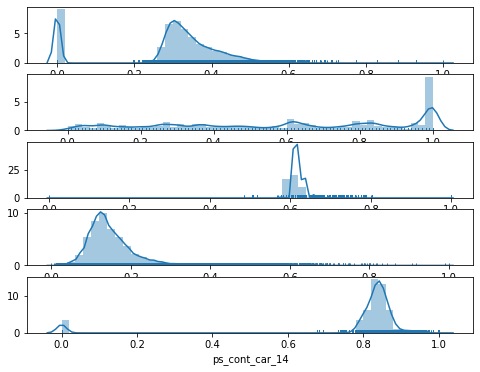

In [39]:
from sklearn.preprocessing import MinMaxScaler
cont = [ feature for feature in data.columns if feature.startswith('ps_cont') ]
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8,6))

for feature, ax in zip(cont, range(5)) :
    norm = MinMaxScaler()
    enc_data[feature] = norm.fit_transform(data[feature].values.reshape((-1,1)))
    sns.distplot(enc_data[feature], rug=True, ax=axs[ax])
fig.show()

In [36]:
# define OneHotEncoder classifier.
from sklearn.preprocessing import OneHotEncoder
import pickle
#encoders = []
enc_data = data[cont].copy()

cat = [ feature for feature in data.columns if feature.startswith('ps_cat') ]
for feature in cat :
        enc = OneHotEncoder(sparse=False)
        encoded = enc.fit_transform(data[feature].values.reshape((-1,1)))
        #encoders.append(enc)
        enc_data = pd.concat((enc_data, pd.DataFrame(encoded)), axis=1)
    
#with open('./data/OneHotEncoder.clf', 'wb') as f:
#    pickle.dump(file=f, obj=encoders)
enc_data.columns = range(enc_data.columns.shape[0])


In [43]:
arr_data

array([[0.31678161, 0.10679612, 0.61812582, ..., 0.        , 0.        ,
        1.        ],
       [0.32563331, 0.17475728, 0.58113883, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.57281553, 0.58113883, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.29672682, 0.15533981, 0.60671951, ..., 0.        , 1.        ,
        0.        ],
       [0.35418662, 0.26213592, 0.6125178 , ..., 0.        , 1.        ,
        0.        ],
       [0.36731826, 0.45631068, 0.58113883, ..., 0.        , 1.        ,
        0.        ]])

In [40]:
enc_data.to_csv('./data/ready_data.csv', index=False)

KeyboardInterrupt: 

In [63]:
arr_data = enc_data.values
np.save('./data/ready_data.npy', arr_data)

In [56]:
corrT = enc_data.corr()
corrT[corrT == 1] = 0
corrT = corrT[corrT.abs() >= 0.8].dropna(how='all').dropna(how='all',axis=1)

In [57]:
for i in range(corrT.shape[0]):
    for j in range(i, corrT.shape[0]):
        if not np.isnan(corrT.iloc[i,j]):
            print(corrT.columns[i], '\t&\t ', corrT.columns[j],'\t=\t', corrT.iloc[i,j])

14 	&	  15 	=	 -0.8332067652460312
30 	&	  111 	=	 0.8227306804042553
31 	&	  32 	=	 -0.9996849983102093
41 	&	  42 	=	 -1.0
43 	&	  44 	=	 -1.0
45 	&	  46 	=	 -1.0
47 	&	  48 	=	 -1.0
49 	&	  50 	=	 -1.0
51 	&	  52 	=	 -1.0
53 	&	  54 	=	 -1.0
53 	&	  57 	=	 0.937284990871276
53 	&	  58 	=	 -0.8579081224344746
54 	&	  57 	=	 -0.937284990871276
54 	&	  58 	=	 0.8579081224344746
55 	&	  56 	=	 -1.0
57 	&	  58 	=	 -0.9277009367633379
76 	&	  77 	=	 -1.0
78 	&	  79 	=	 -1.0
80 	&	  81 	=	 -1.0
125 	&	  126 	=	 -0.9999761922525835
132 	&	  176 	=	 0.8997608449393274
162 	&	  163 	=	 -0.8429748320404173
164 	&	  165 	=	 -1.0
167 	&	  169 	=	 -0.8423766315005258
172 	&	  173 	=	 -0.9825193870617137
379 	&	  380 	=	 -1.0
381 	&	  382 	=	 -1.0
383 	&	  384 	=	 -1.0
385 	&	  386 	=	 -1.0
387 	&	  388 	=	 -1.0
389 	&	  390 	=	 -1.0


 Duplicates:
 31 32
41 	&	  42
43 	&	  44 	
45 	&	  46 	
47 	&	  48 	
49 	&	  50 	
51 	&	  52 	
53 	&	  54 	
53 	&	  57 
54 	&	  57
55 	&	  56 	
57 	&	  58 	
76 	&	  77 	
78 	&	  79 	
80 	&	  81 	
125 	&	  126
164 	&	  165
172 	&	  173 
379 	&	  380 
381 	&	  382 
383 	&	  384 
385 	&	  386 
387 	&	  388 
389 	&	  390



42,44,46,48,50,52,54,57,56,58,77,79,81,126,165,173,380,382,384,386,388,390

In [62]:
# drop cols with more than 93% correlation
cols_to_drop = [42,44,46,48,50,52,54,57,56,58,77,79,81,126,165,173,380,382,384,386,388,390]
enc_data.drop(columns=cols_to_drop, inplace=True)

In [50]:
arr_data = enc_data.values
np.save('./data/ready_data.npy', arr_data)

In [64]:
enc_data.shape

(1488028, 369)

-----------